# **Project Leyenda - Deliverable 1**

*Group* : 
|Author|Center|Promo|Mail| 
|---|---|---|---|
|De Jesus Correia Alexandre|Nanterre|FISE INFO A5|alexandre.dejesuscorreia@viacesi.fr|
|Charlut Steven|Nanterre|FISE INFO A5|steven.charlut@viacesi.fr|
|Debraize Killian|Nanterre|FISE INFO A5|killian.debraize@viacesi.fr|
|Raies Youssef|Nanterre|FISE INFO A5|youssef.raies@viacesi.fr|
|Kinya Mwongera Sharon|Nanterre|FISE INFO A5|sharon.kinyamwongera@viaceis.fr|

![DeepLearning](https://i.pinimg.com/550x/4f/a5/54/4fa5542fadd6a9ee2e7f995b981934f6.jpg)


# **Project**

## Context :

**TouNum**, a company specializing in the digitization of documents (text, images, etc.), is looking to expand its services to include 'Machine Learning' tools. Their current focus is on providing solutions for companies with large volumes of documents that need digitization, and they want to offer a service for automatic image categorization. Although TouNum has experience in digitization, they lack expertise in Machine Learning and have turned to CESI Data Science specialists to develop a solution. The proposed solution aims to analyze and describe images (captioning) in an automated way.

In addition to this core goal, there are two main challenges:
- **`Image Cleaning`** : Due to variations in image quality (e.g., blurriness, noise), a cleaning/pre-processing step is required before analyzing the images.
- **`Image Classification`** : Since many of the digitized images are not actual photos but could be documents, diagrams, sketches, or paintings, there needs to be an initial classification step to separate photographs from other types of images.

Luckily, TouNum has a dataset with thousands of categorized and labeled images, which can be used for supervised learning to train the necessary models.

## Objectives :

The project has three main objectives that will lead to a fully automated image analysis and captioning solution:
- **`Binary Classification`** :
Develop a neural network model using TensorFlow and SciKit to classify images into two categories—photos and non-photos (e.g., scanned documents, diagrams, paintings). Ideally, the model should differentiate between photos and other types of images, including drawings or paintings. This module will involve image pre-processing and the use of convolutional neural networks (CNN).
- **`Image Processing`** :
Implement image cleaning and pre-processing techniques using simple convolution filters to enhance the quality of the images before running further analyses. This step ensures that images are clear enough for subsequent classification and captioning tasks.
- **`Image Captioning`** :
Build a captioning model that automatically generates descriptive captions for images. This will require using a combination of convolutional neural networks (CNNs) for image processing and recurrent neural networks (RNNs) to generate textual descriptions. The model will be trained using classical datasets for image captioning.

The final solution should be presented as a reproducible workflow (using Jupyter notebooks), and the prototype must be ready for deployment within five weeks. The workflow should be scalable and adaptable to any image data and include clear documentation to ensure maintenance and further development.

## Tools : 

For our project, we will utilize **`Python`** as our programming language. Python offers libraries, such as NumPy and Pandas, that facilitate efficient data manipulation and analysis, while libraries like Scikit-learn and TensorFlow provide robust tools for implementing machine learning (ML) and deep learning (DL) algorithms.

**`TensorFlow`**, a powerful open-source framework designed for building and deploying ML and DL models, will be our main project tool.
It operates on the concept of 'tensors', which are multi-dimensional arrays that allow for efficient data representation and manipulation. The term 'flow' refers to the way data moves through a computational graph, where operations are represented as nodes and tensors as edges. This architecture enables TensorFlow to optimize the performance of complex mathematical computations, making it ideal for tasks such as neural network training and inference. 

Moreover, TensorFlow provides a rich ecosystem with high-level APIs, such as **`Keras`**, for quick model prototyping, along with lower-level operations for fine-tuning performance.

# **Deliverable 1 : Binary Classification**

TouNum aims to automate the selection of photos from a dataset that contains various types of images, such as scanned text, drawings, diagrams, and paintings. The ultimate goal is to filter out images that are not photos in preparation for captioning, which will be addressed in the next phase of the project. To achieve this, the deliverable will involve building and training a neural network model using TensorFlow to differentiate between photos and non-photo images.

Given the wide variety of image types in the dataset, the challenge lies in **creating a robust model that can reliably distinguish photos from these other categories**. The approach should start with simpler distinctions and gradually incorporate more challenging tasks, such as differentiating realistic paintings from actual photos.

The deliverable will include a detailed documentation of the neural network's architecture, the training process, and the resulting performance. The performance metrics will also be thoroughly analyzed to ensure the model strikes a balance between bias and variance and avoids common pitfalls like overfitting or underfitting.

## Basic Theory : 

#### Perceptron : 
A **'Perceptron'** is a type of artificial neuron, a basic unit in neural networks, designed to simulate the behavior of biological neurons. 

It takes several `input values`, applies `weights` to each of these inputs, `sums` them up with a `bias` (additional parameter that helps adjust the output), and passes the result through an `activation function`. If the result exceeds a certain threshold, the perceptron "fires", meaning it produces an `output` (typically 1; otherwise, the output is 0). This process where the input data is passed through the network’s layers to generate an output is called **`Forward Propagation`**.

![Perceptron](https://miro.medium.com/v2/resize:fit:940/1*6HtyqOTYyYUzUeERVXL8Ag.png)

`Weights` are parameters that determines the strength and direction of the connection between neurons across layers. It influences how much influence an input or neuron’s output has on the following layer, and during training, the model adjusts these weights to minimize errors and improve its predictions.

An `activation function` defines how the output of a neuron is calculated based on its input, **introducing non-linearity into the model**. Common examples include :
- the **sigmoid function**, which outputs values between 0 and 1, 
- the **ReLU (Rectified Linear Unit)**, which outputs 0 for negative inputs and the input itself for positive values,
- the **tanh function**, which maps inputs to values between -1 and 1,
- the **softmax function**, which converts raw outputs into probabilities on classes (and normalizing them so that the sum of all probabilities equals 1).

These functions are crucial in neural networks because it introduces non-linearity, allowing the model to learn and represent complex patterns and relationships beyond simple linear combinations of inputs, so we can solve non linear problem.

This simple decision-making process enables a perceptron to classify data into two categories, making it the foundation of binary classifiers. However, on its own, a single perceptron is limited in its ability to solve complex problems, as it can only classify linearly separable data.

#### Deep Neural Network :
A **'Deep Neural Network'** is an advanced structure composed of multiple layers of interconnected neurons (or perceptrons). 

Instead of just a single perceptron making decisions, in a deep neural network, there are several `hidden layers` between the `input player` and the `output layer`. Each layer processes data through many neurons, each performing a similar function to a perceptron. The network's depth allows it to capture more complex patterns and hierarchical representations from the data. The neurons in each layer take in the weighted sum of inputs from the previous layer, pass them through activation functions (like ReLU or sigmoid), and then send the output to the next layer.

![DNN](https://www.researchgate.net/profile/Chuan-Lin-3/publication/333567419/figure/fig4/AS:765686351671297@1559565260413/Construction-of-the-deep-neural-network-DNN-model.jpg)

`Hidden layers` in a DNN can include :
- **Dense layers** (*or Fully connected layers*) : connect every neuron in one layer to every neuron in the next, allowing the network to capture global patterns in the data, 
- **Convolutional layers** : apply filters to detect local features like edges or textures, 
- **Dropout layers** : randomly deactivate a portion of neurons during training to prevent overfitting, improving generalization, 
- **Batch normalization layers** : normalize the inputs to each layer, speeding up training and improving stability, 
- **Pooling layers** : reduce the spatial dimensions of feature maps by summarizing nearby values, which helps to reduce computational complexity and makes the model more robust to small translations in the input. The most common types are ***Max Pooling***, which selects the maximum value from a region, and ***Average Pooling***, which takes the average of the values in that region.

Through this process, the network can model intricate relationships and solve highly non-linear problems. Deep neural networks have become essential in tasks like image recognition, natural language processing, and other sophisticated AI applications due to their capacity to learn complex patterns through multiple layers of abstraction.

### A.3. Neurons & Tensors

A **`neuron`** is a fundamental computational unit that processes input data :
- The neurons in the input layer do not perform any computation : it simply forwards the input data to the next layer. Each neuron here represents a feature vector of the input data.
- The neurons in the hidden layers compute a weighted sum of the inputs : each input is associated with a weight that determines its significance.
- The neurons in the output layer produce the final prediction (or classification).

In our model, the **inputs** are the dataset's images. When processed by a neural network, these images are converted into **numerical matrices** that represent pixel values. 
However, neural networks (especially in TensorFlow), essentially manipulate **tensors** throughout training and predictions.

A **`tensor`** is a generalized data structure that can be seen as *multi-dimensional arrays of numbers* that represent complex data. For example, a one-dimensional vector is referred to as a 1D tensor, while a two-dimensional matrix is called a 2D tensor. In the case of a color image, a tensor would be a 3D array : height, width, and depth (corresponding to the three color channels : red, green and blue).

Hence, each image need to be converted into a tensor, and will then be passed through the network to be analyzed and classified. 

<img src="https://hkilter.com/images/7/7a/Tensors.png"  width="600">

## B. Neural Networks for Image Data

### B.1. Image Data

A `digital image` is made of pixels, which are the smallest elements of an image. 

In a black-and-white image, each pixel is represented by a number ranging from 0 (completely dark) to 255 (completely bright). These numbers indicate the intensity of light at that pixel. This kind of image data is the simplest form, often referred to as a grayscale image, because it only contains information about the brightness, not color.

In color images, each pixel is represented by three numbers instead of one. These three numbers correspond to the primary colors of light: Red, Green, and Blue (RGB). Each of these values also ranges from 0 to 255, where 0 means no contribution of that color and 255 means the maximum contribution. By combining different levels of red, green, and blue, we can create any color.

So, whether an image is black-and-white or color, the data underlying an image consists of a large grid of numerical values. These numbers form what we call **`image data`**, and this data is essential for computers to process, manipulate, or analyze images in tasks like image recognition, editing, or machine learning.

***Example** : the image data for an image "8" from the MNIST Dataset* 

<img src="https://miro.medium.com/v2/resize:fit:794/0*9iwH0ebD6mQAUFt8"  width="400">

## B.2. Convolutional Neural Networks (CNNs)

**`Convolutional Neural Networks`** are specialized for image data. They excel in identifying spatial hierarchies and features within visual information.

CNNs utilize a special type of "hidden" layer, the **convolutional layer**, that makes them well-positioned to learn from image and image-like data. Regarding image data, CNNs can be used for many different computer vision tasks, such as `image processing`, `classification`, `segmentation`, and `object detection`.

<img src="https://editor.analyticsvidhya.com/uploads/568241-4.png"  width="600">

The `input layer` represents the input image. Because we use RGB images as input, the input layer has three channels, corresponding to the red, green, and blue channels respectively, which are shown in this layer. 

The `convolutional layers` are the foundation of CNN, as they contain the `learned kernels`, which extract features that distinguish different images from one another (this is particularly important for classification). 

This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters, the **`kernel`** or filter, and the other matrix is the restricted portion of the receptive field. The kernel is spatially smaller than an image, but is more in-depth. This means that, if the image is composed of three (RGB) channels, the kernel height and width will be spatially small, but the depth extends up to all three channels.

During the forward pass, the kernel slides across the height and width of the image, producing the image representation of that receptive region. This produces a two-dimensional representation of the image (the output, known as an **activation map**) that gives the response of the kernel at each spatial position of the image.

Like others hidden layers, after the convolution operation, an activation function (commonly the ReLU function) is applied to introduce non-linearity.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*ulfFYH5HbWpLTIfuebj5mQ.gif"  width="500">

`Hyperparameters of the Kernels` : 
- **Padding** : it conserves data at the borders of activation maps, which leads to better performance, and it can help preserve the input's spatial size, which allows an architecture designer to build deeper, higher performing networks. There exist many padding techniques, but the most commonly used approach is **zero-padding**, because of its performance, simplicity, and computational efficiency : the technique involves adding zeros symmetrically around the edges of an input.
- **Size** : refers to the dimensions of the sliding window over the input (often 3x3 or 5x5). Choosing this hyperparameter has a massive impact on the image classification task. For example, small kernel sizes are able to extract a much larger amount of information containing highly local features from the input. Then, a smaller kernel size also leads to a smaller reduction in layer dimensions, which allows for a deeper architecture. Conversely, a large kernel size extracts less information, which leads to a faster reduction in layer dimensions, often leading to worse performance. Large kernels are better suited to extract features that are larger.
- **Stride** : indicates how many pixels the kernel should be shifted over at a time. The impact stride has on a CNN is similar to kernel size. As stride is decreased, more features are learned because more data is extracted, which also leads to larger output layers. On the contrary, as stride is increased, this leads to more limited feature extraction and smaller output layer dimensions.

The `pooling layers` have the purpose of gradually decreasing the spatial extent of the network, which reduces the parameters and overall computation of the network. There are many types of pooling layers in different CNN architectures, but `Max pooling` is the most popular technique (where the maximum value from a specific region of the feature map is taken).

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*sK7oP1m129V_oNGSsHIm_w.png"  width="500">

A `flatten layer` can also be necessary : it converts a multi-dimensional layer into a one-dimensional vector to fit the input of a fully-connected layer for classification. For example, a 5x5x2 tensor would be converted into a vector of size 50. Particularly, some activation function (like the softmax function in dense layers) requires a 1-dimensional input.

<img src="https://www.megabagus.id/wp-content/uploads/Machine_Learning/deep_learning/CNN/flattening.jpg"  width="300">

### B.3. Image Classification 

The early applications of neural networks are image classification. 

For example, the digit recognition for ‘0’ to ‘9’ given various hand-written images. A trained neural network model can take an unknown digital image data to predict the probabilities for the multi-class output “0” to “9”. All these probabilities will then sum up to 1.0.

Likewise, if we feed a neural network with various kinds of images with their corresponding labels (images and photos), the neural network can be trained to tell the likelihood for a new image. 

For an algorithm to recognize images in a manner comparable to human recognition, it must undergo a similar learning process. We achieve this by training the algorithm with thousands of labeled images (some labeled “photos”, and other types). During this training, the model learns to discern specific features that differentiate images from photos. Once trained, the model can analyze new, unlabeled images and determine whether they depict a photo or an image based on the features it has learned. 

***Example :** Image classification with animal labels* 

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/0*sVuvA9R9x8s3_EJ_.png"  width="500">

### B.4. AutoEncoders (AE)

An **`autoencoder`** is a specialized type of neural network designed **to replicate its input values as its output values**. Unlike neural networks which are generally categorized under supervised learning, autoencoders are categorized under **unsupervised learning**, because they **do not need additional labeled targets**. The key interest in autoencoders lies not in the output layer (because it is simply a copy of the input layer) but in the **hidden layers**.

An autoencoder should have fewer neurons in the hidden layers than that of the input layers. Because the hidden layers, which have fewer neurons than the input layers, must extract and retain only the most important features of the input data, the autoencoder will be forced **to compress the data into a lower-dimensional representation**, capturing the essential patterns while filtering out irrelevant noise. 

If the hidden layers had more neurons than the input layers, the model could become too flexible and reproduce the input exactly, including the noise, without effectively learning the significant patterns. The dimensionality reduction enforced by having fewer neurons in the hidden layers helps the model focus on the core features of the data.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*RR_anSGJL6W3FqCw.png"  width="600">

The `encoder` compresses the input values into a more compact representation at the core layer. This process resembles a funnel that is wide on the left side, where the input data enters, and narrows towards the right side, where the compressed representation is produced.

The `decoder` reconstructs the compressed information to generate the output. This process is visually similar to an inverted funnel: narrow on the left side, where the compressed data is input, and widening towards the right side, where the reconstructed output is produced. The information of the image is highly compressed in the core hidden layer then recontructed to itself. Thus the core hidden layer should retain the information of the image as much as possible.

Typically, the architecture of the decoderis designed **to mirror** the encoder. This means that the number of neurons and the number of hidden layers in the decoding funnel are structured to correspond to those in the encoding funnel. Most practitioners adopt this symmetry as a standard approach. 

Autoencoders have various applications, like **dimensionality reduction**, **image coloring** or even **noise reduction**. 

# **Building a Neural Network Model for Binary Classification**

Now that we have established the theoretical foundations regarding image classification and key concepts such as convolutional neural network architecture (CNN), we can move on to the creation of our model. In the next section, we will design and implement our binary classification model. 

## 1. Initial Setup

In [51]:
# Import libraries

# TensorFlow/Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img
from sklearn.utils.class_weight import compute_class_weight

# Others Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from tqdm.notebook import tqdm
from PIL import Image
import shutil
from tqdm.notebook import tqdm  

In [22]:
# DataSet Loading

base_dir = os.getcwd()
relative_path = r"..\..\DataSets\data_set_livrable_1"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

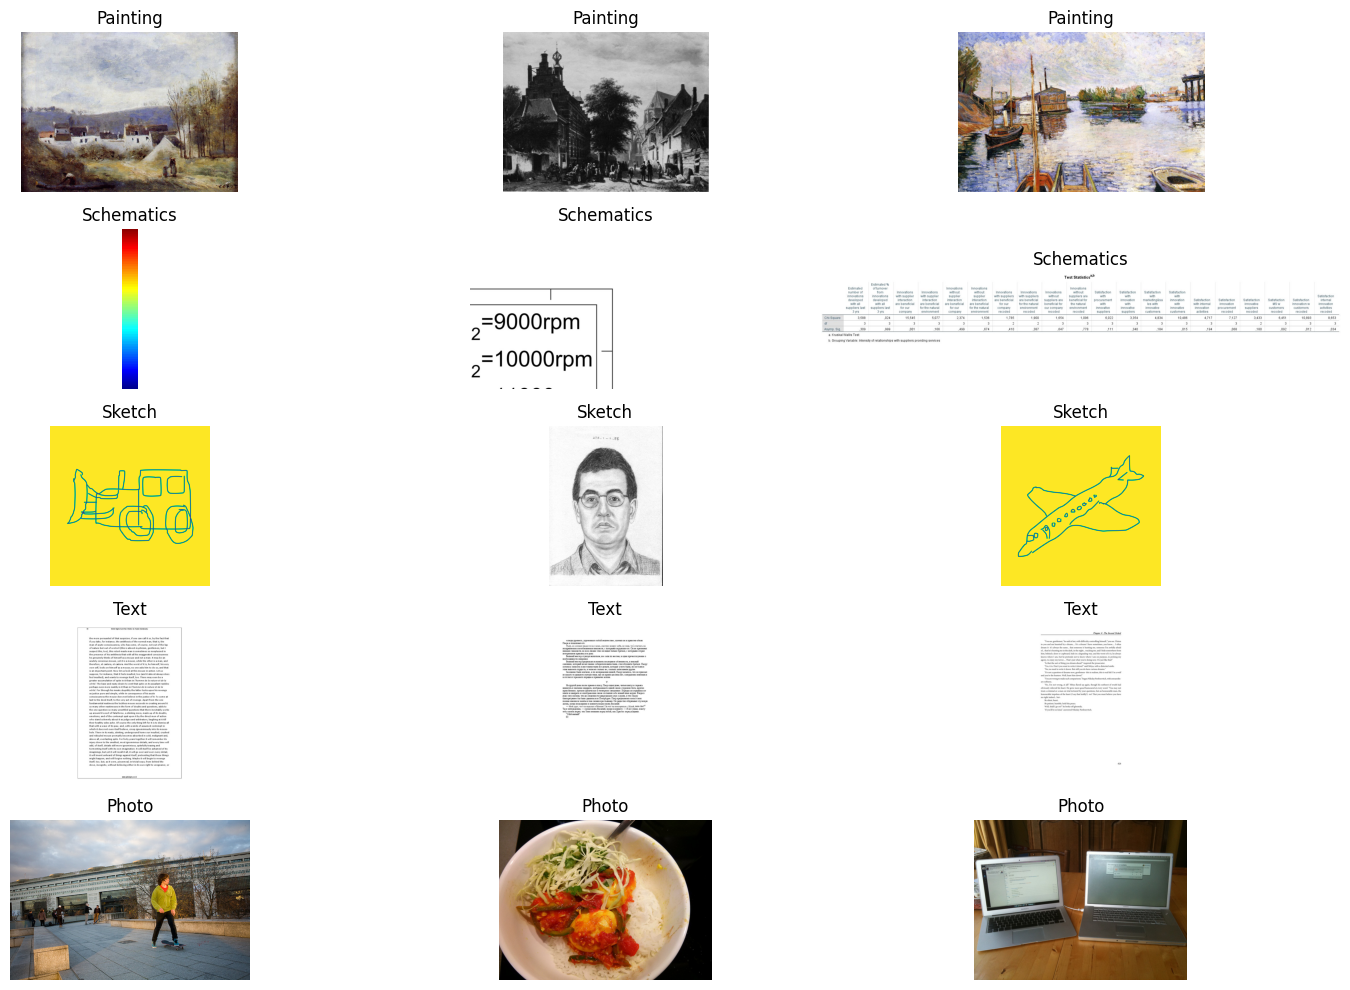

In [47]:
# Data Visualization 

# Load images from each category
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            images.append(img_path)
    return images

# Define the subdirectory names for each category
photo_folder = os.path.join(dataset_dir, 'Photo')
image_folder = os.path.join(dataset_dir, 'Image')
categories = ['Painting', 'Schematics', 'Sketch', 'Text', 'Photo']

# Dictionary to hold images from each category
category_images = {}

# Load images from each category in the Image folder
for category in ['Painting', 'Schematics', 'Sketch', 'Text']:
    category_folder = os.path.join(image_folder, category)
    category_images[category] = load_images_from_folder(category_folder)
category_images['Photo'] = load_images_from_folder(photo_folder)

# Function to plot a grid of images
def plot_sample_images(category_images, samples_per_category=3):
    plt.figure(figsize=(15, 10))
    for i, (category, images) in enumerate(category_images.items()):
        # Randomly select a few images from each category
        sample_images = random.sample(images, min(samples_per_category, len(images)))
        for j, img_path in enumerate(sample_images):
            img = mpimg.imread(img_path)
            plt.subplot(len(category_images), samples_per_category, i * samples_per_category + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(category)
    plt.tight_layout()
    plt.show()

# Call the function to plot sample images
plot_sample_images(category_images, samples_per_category=3)

## 2. Data Cleaning

Some images in the datasets may cause problems or not be relevant for our model learning (e.g., monochrome images without patterns). It is therefore necessary to clean the dataset of unnecessary images, that is to say unusable (or corrupted) and monotonous files. For the latter, we will calculate the `pixel variance` of each file : **files with low variance will then be deleted** to ensure performance during the model’s construction. Let’s first analyze our dataset.

In [49]:
# Function to check for corrupted images and calculate pixel variance
def check_all_images_for_corruption_and_variance(directory):
    results = []
    categories = ['Image', 'Photo']
    
    for category in categories:
        if category == 'Image':
            subcategories = ['Painting', 'Schematics', 'Sketch', 'Text']
            for subcategory in subcategories:
                subcategory_path = os.path.join(directory, 'Image', subcategory)
                if os.path.exists(subcategory_path):
                    total_images = 0
                    corrupted_images = 0
                    low_variance_images = 0
                    for file in os.listdir(subcategory_path):
                        img_path = os.path.join(subcategory_path, file)
                        if os.path.isfile(img_path):
                            total_images += 1
                            try:
                                img = Image.open(img_path)
                                img.verify()  # Checks if the image is corrupted
                                # Reopen to calculate pixel variance
                                img = Image.open(img_path).convert('RGB')
                                img_array = np.array(img)
                                variance = np.var(img_array)
                                if variance < 50:  # Detects low variance images
                                    low_variance_images += 1
                            except (IOError, SyntaxError) as e:
                                corrupted_images += 1
                    results.append([subcategory, total_images, corrupted_images, low_variance_images])
        
        elif category == 'Photo':
            photo_path = os.path.join(directory, 'Photo')
            if os.path.exists(photo_path):
                total_images = 0
                corrupted_images = 0
                low_variance_images = 0
                for file in os.listdir(photo_path):
                    img_path = os.path.join(photo_path, file)
                    if os.path.isfile(img_path):
                        total_images += 1
                        try:
                            img = Image.open(img_path)
                            img.verify()  # Checks if the image is corrupted
                            # Reopen to calculate pixel variance
                            img = Image.open(img_path).convert('RGB')
                            img_array = np.array(img)
                            variance = np.var(img_array)
                            if variance < 50:  # Detects low variance images
                                low_variance_images += 1
                        except (IOError, SyntaxError) as e:
                            corrupted_images += 1
                results.append(['Photo', total_images, corrupted_images, low_variance_images])

    return results

def display_corruption_and_variance_stats(results):
    df = pd.DataFrame(results, columns=['Category', 'Total Images', 'Corrupted Images', 'Low Variance Images'])
    df['Proportion Corrupted (%)'] = (df['Corrupted Images'] / df['Total Images']) * 100
    df['Proportion Low Variance (%)'] = (df['Low Variance Images'] / df['Total Images']) * 100
    print(df)

# Call the function to display the analysis
results = check_all_images_for_corruption_and_variance(dataset_dir)
display_corruption_and_variance_stats(results)

     Category  Total Images  Corrupted Images  Low Variance Images  \
0    Painting          1920                 0                    0   
1  Schematics         10001                 1                  163   
2      Sketch          1406                 0                    0   
3        Text         10000                 0                   19   
4       Photo          9997                 0                    0   

   Proportion Corrupted (%)  Proportion Low Variance (%)  
0                  0.000000                     0.000000  
1                  0.009999                     1.629837  
2                  0.000000                     0.000000  
3                  0.000000                     0.190000  
4                  0.000000                     0.000000  


We can see that there is one corrupted image in the "Schematics" folder, as well as 163 images and 19 images with low variance  in the "Schematics" and "Text" folders respectively. 

To prevent future model learning problems, we will delete these files, and create a new **"clean dataset"**.

In [ ]:
# Function to check if an image is corrupted or low variance
def check_image_quality(img_path):
    try:
        # Check if image is corrupted
        img = Image.open(img_path)
        img.verify()  
        
        # Reopen to check pixel variance
        img = Image.open(img_path).convert('RGB')
        img_array = np.array(img)
        variance = np.var(img_array)
        
        # Consider the image as "low quality" if variance is below a threshold
        if variance < 50:           # Adjust this threshold if necessary
            return "Low Variance"
        return "Valid"
    
    except (IOError, SyntaxError):
        return "Corrupted"

# Function to check if the file is already filled
def is_folder_filled(folder_path):
    total_files = sum([len(files) for r, d, files in os.walk(folder_path)])
    return total_files > 0

# Function to analyze the dataset and generate a DataFrame of corrupted and low quality images
def analyze_dataset_for_issues(dataset_dir):
    categories = ['Image', 'Photo']
    invalid_images_list = []
    
    for category in categories:
        if category == 'Image':
            subcategories = ['Painting', 'Schematics', 'Sketch', 'Text']
            for subcategory in subcategories:
                subcategory_path = os.path.join(dataset_dir, 'Image', subcategory)
                if os.path.exists(subcategory_path):
                    img_files = [f for f in os.listdir(subcategory_path) if os.path.isfile(os.path.join(subcategory_path, f))]
                    
                    # Added a progress bar here for each sub-category
                    for img_file in tqdm(img_files, desc=f"Processing {subcategory}", leave=False):
                        img_path = os.path.join(subcategory_path, img_file)
                        quality_status = check_image_quality(img_path)
                        if quality_status != "Valid":
                            invalid_images_list.append({'Filename': img_file, 'Category': subcategory, 'Issue': quality_status})
        
        elif category == 'Photo':
            photo_path = os.path.join(dataset_dir, 'Photo')
            if os.path.exists(photo_path):
                img_files = [f for f in os.listdir(photo_path) if os.path.isfile(os.path.join(photo_path, f))]
                
                # Added progress bar for "Photo" category
                for img_file in tqdm(img_files, desc="Processing Photo", leave=False):
                    img_path = os.path.join(photo_path, img_file)
                    quality_status = check_image_quality(img_path)
                    if quality_status != "Valid":
                        invalid_images_list.append({'Filename': img_file, 'Category': 'Photo', 'Issue': quality_status})
    
    # Convert list to DataFrame
    df_invalid_images = pd.DataFrame(invalid_images_list)
    return df_invalid_images

# Function to create a clean dataset excluding corrupted or low variance images
def create_clean_dataset(df_invalid_images, dataset_dir, new_clean_dir):
    categories = ['Image', 'Photo']
    
    # Create new "clean dataset" folder
    os.makedirs(new_clean_dir, exist_ok=True)

    if is_folder_filled(new_clean_dir):
        print(f"Folder {new_clean_dir} is already filled. Skipping process.")
        return  # If the file is already filled, stop here to avoid redoing the copy.
    
    for category in categories:
        if category == 'Image':
            subcategories = ['Painting', 'Schematics', 'Sketch', 'Text']
            for subcategory in subcategories:
                subcategory_path = os.path.join(dataset_dir, 'Image', subcategory)
                if os.path.exists(subcategory_path):
                    new_subcategory_path = os.path.join(new_clean_dir, 'Image', subcategory)
                    os.makedirs(new_subcategory_path, exist_ok=True)
                    
                    img_files = [f for f in os.listdir(subcategory_path) if os.path.isfile(os.path.join(subcategory_path, f))]
                    
                    # Added progress bar here for copying valid files
                    for img_file in tqdm(img_files, desc=f"Copying {subcategory}", leave=False):
                        img_path = os.path.join(subcategory_path, img_file)
                        new_img_path = os.path.join(new_subcategory_path, img_file)

                        # Check if image is corrupted or low variance
                        if not ((df_invalid_images['Filename'] == img_file) & (df_invalid_images['Category'] == subcategory)).any():
                            shutil.copy(img_path, new_img_path)
        
        elif category == 'Photo':
            photo_path = os.path.join(dataset_dir, 'Photo')
            new_photo_path = os.path.join(new_clean_dir, 'Photo')
            os.makedirs(new_photo_path, exist_ok=True)
            
            img_files = [f for f in os.listdir(photo_path) if os.path.isfile(os.path.join(photo_path, f))]
            
            # Added progress bar for copying photos
            for img_file in tqdm(img_files, desc="Copying Photo", leave=False):
                img_path = os.path.join(photo_path, img_file)
                new_img_path = os.path.join(new_photo_path, img_file)

                # Check if image is corrupted or low variance
                if not ((df_invalid_images['Filename'] == img_file) & (df_invalid_images['Category'] == 'Photo')).any():
                    shutil.copy(img_path, new_img_path)


# Path to new clean dataset
new_clean_dir = os.path.normpath(os.path.join(dataset_dir, r"..\clean_dataset"))

# Check if the clean dataset is already filled
if not is_folder_filled(new_clean_dir):
    # Analyze the entire dataset to identify corrupted and low variance images
    df_invalid_images = analyze_dataset_for_issues(dataset_dir)

    # Create the dataset clean excluding problematic images
    create_clean_dataset(df_invalid_images, dataset_dir, new_clean_dir)
else:
    print(f"The clean dataset is already filled in {new_clean_dir}.")


dsdsdsds